In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Preprocess Data

In [15]:
lifesat = pd.read_csv('data/lifesat/lifesat.csv')
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [13]:
lifesat.describe()

,GDP per capita (USD),Life satisfaction
count,27.000000,27.000000
mean,41564.521771,6.566667
std,9631.452319,0.765607
min,26456.387938,5.400000
25%,33938.289305,5.900000
50%,41627.129269,6.800000
75%,49690.580269,7.300000
max,60235.728492,7.600000


In [14]:
lifesat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 776.0+ bytes


# Exploratory Data Analysis

In [19]:
sns.set_palette('GnBu_d')
sns.set_style('whitegrid')

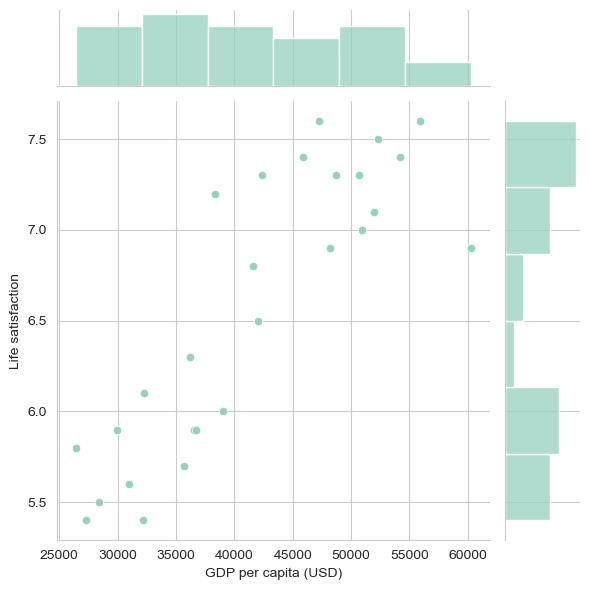

In [21]:
# More GDP per capita (USD), more satisfation in life
sns.jointplot(x='GDP per capita (USD)',y='Life satisfaction',data=lifesat)

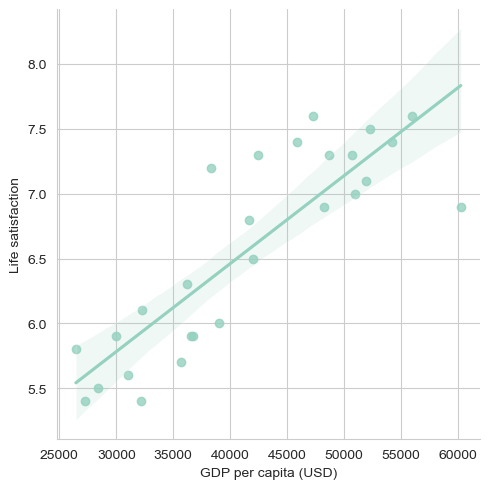

In [23]:
sns.lmplot(x='GDP per capita (USD)',y='Life satisfaction',data=lifesat)

# Training and Testing Data

In [25]:
X = lifesat[['GDP per capita (USD)']]
y = lifesat['Life satisfaction']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Training the Model

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [6.85399432e-05]


## Predicting Test Data

In [31]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

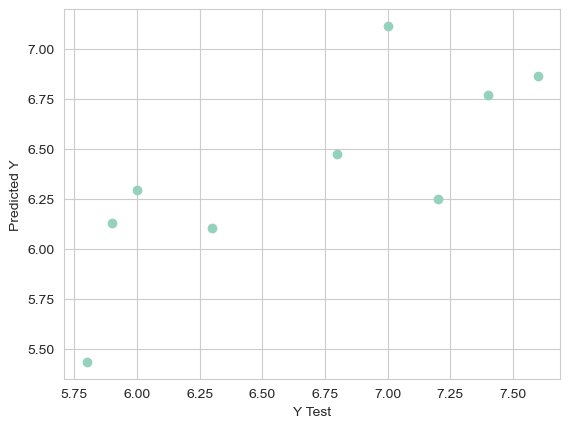

In [32]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.42676388336908505
MSE: 0.2528767557684206
RMSE: 0.5028685273194382


In [39]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

# Holding all other features fixed, a 1 unit increase in GDP per capita (USD) is associated with an increase of 0.000069 life satisfaction

,Coeffecient
GDP per capita (USD),0.000069
